# Practica 3 Sistemas de Recomendacion KDtree

Primero vamos a proceder con la lectura de la base de datos, se esta creando una matriz, dado que en este caso intersectar los valores en cada paso tomaria mucho tiempo, tambien se contabilia el numero de datos que se estan cargando en cada paso.

In [1]:
from math import *
import pandas as pd
import numpy as np

# Test the kNN on the Iris Flowers dataset
ratings = pd.read_csv('ratings.csv')
#peliculas = pd.read_csv('movies.csv')

nro_peliculas=193609
nro_personas=610

dataset=np.zeros((nro_personas, nro_peliculas))

m=0
pasos=1000
print("Conteo de Procesados")
for indice_fila, fila in ratings.iterrows():
    dataset[int(fila[0])-1][int(fila[1])-1]=float(fila[2])
    if m%pasos==0:
        print(m,end=" ")
    m=m+1
print("Completado")

Conteo de Procesados
0 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000 48000 49000 50000 51000 52000 53000 54000 55000 56000 57000 58000 59000 60000 61000 62000 63000 64000 65000 66000 67000 68000 69000 70000 71000 72000 73000 74000 75000 76000 77000 78000 79000 80000 81000 82000 83000 84000 85000 86000 87000 88000 89000 90000 91000 92000 93000 94000 95000 96000 97000 98000 99000 100000 Completado


Eliminamos los valores que quedaron en 0, para hacer que sean el Nan de numpy y despues podamos desarrollar correctamente todo

In [3]:
m=0
pasos=100
for i in range(len(dataset)):
    for j in range(len(dataset[0])):
        if dataset[i][j]==0:
            dataset[i][j]=np.nan
    if m%pasos==0:
        print(m,end=" ")
    m=m+1
print("Completado")

0 100 200 300 400 500 600 Completado


### Definimos la Funcion Cosenos

In [13]:
def cosine(fila1, fila2,umbral):
    xy=0
    xx=0
    yy=0

    for i in range(len(fila1)):
        if(fila1[i]!= np.nan and fila2[i]!= np.nan):
            if(fila1[i]>=umbral and fila2[i]>=umbral):
                xy=xy+fila1[i]*fila2[i]
                xx=xx+fila1[i]*fila1[i]
                yy=yy+fila2[i]*fila2[i]
    
    if xx==0 or yy==0:
        ang=-1
    else:
        ang=xy/(sqrt(xx)*sqrt(yy))
    return ang

### Definimos la Funcion Pearson

In [ ]:
def pearson(fila1, fila2,umbral):
    xy=0
    x=0
    y=0
    xx=0
    yy=0
    n=0

    for i in range(len(fila1)):
        if(fila1[i]!= np.nan and fila2[i]!= np.nan):
            if(fila1[i]>=umbral and fila2[i]>=umbral):
                n=n+1
                xy=xy+fila1[i]*fila2[i]
                x=x+fila1[i]
                y=y+fila2[i]
                xx=xx+fila1[i]*fila1[i]
                yy=yy+fila2[i]*fila2[i]

    if n==0:
        r=-1
    else:
        if sqrt(xx-(x*x/n))==0 or sqrt(yy-(y*y/n))==0:
            r=-1
        else:
            r=(xy-((x*y)/n))/(sqrt(xx-(x*x/n))*sqrt(yy-(y*y/n)))
    return r

### Definimos la Funcion Manhathan

In [12]:
def manhathan(row1, row2,umbral):
    distance = 0.0
    for i in range(len(row1)):
        if(row1[i]!= np.nan and row2[i]!= np.nan):
            if row1[i]>=umbral and row2[i]>=umbral:
                distance += abs(row1[i] - row2[i])
    return distance


### Definimos la Funcion Euclidean

In [ ]:
def euclidean(row1, row2,umbral):
    distance = 0.0
    for i in range(len(row1)):
        if(row1[i]!= np.nan and row2[i]!= np.nan):
            if row1[i]>=umbral and row2[i]>=umbral:
                distance += (row1[i] - row2[i])**2
    return sqrt(distance)

### Pruebas de Valores 

In [14]:
row0=146
row1=610
distance = manhathan(dataset[row0-1], dataset[row0-1],umbral)
print(distance)

0.0


### Pruebas de Tiempo

Para las pruebas de tiempo se usaron un cierto numero de valores para cada una de las funciones, anotando los tiempos demorados para poder graficarlos.

In [15]:
row0=1
umbral=0
for row in dataset:
    distance = manhathan(dataset[row0-1], row,umbral)
    #if distance>0:
    #    print(distance,end=" ")
#print("")
print("Completado")

Completado


In [27]:
from time import time
import matplotlib.pyplot as plt

In [30]:
row0=1
umbral=0
tiempos=[]
cantidad=[]

for i in range(0,nro_personas,10):
    cantidad.append(i)
    start_time = time()
    for j in range(i):
        distance = manhathan(dataset[0], dataset[j],umbral)
    tiempos.append(time()-start_time)
    print(i,end=" ")

0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 

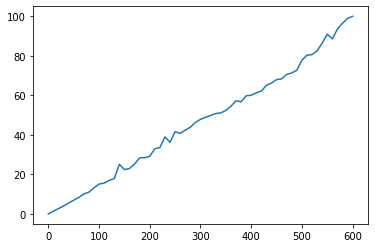

In [31]:
plt.plot(cantidad,tiempos, label='linear')

In [16]:
row0=1
umbral=2
for row in dataset:
    distance = euclidean(dataset[row0-1], row,umbral)
    #if distance>0:
    #    print(distance,end=" ")
#print("")
print("Completado")

Completado


In [32]:
umbral=0
tiempos=[]
cantidad=[]

for i in range(0,nro_personas,30):
    cantidad.append(i)
    start_time = time()
    for j in range(i):
        distance = manhathan(dataset[0], dataset[j],umbral)
    tiempos.append(time()-start_time)
    print(i,end=" ")

0 30 60 90 120 150 180 210 240 270 300 330 360 390 420 450 480 510 540 570 600 

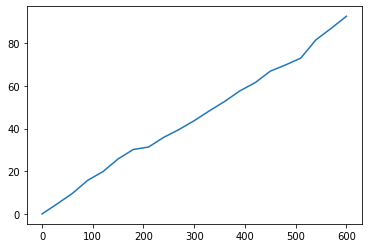

In [33]:
plt.plot(cantidad,tiempos, label='linear')

In [17]:
row0=1
umbral=2
for row in dataset:
    distance = pearson(dataset[row0-1], row,umbral)
    #if distance>0:
    #    print(distance,end=" ")
#print("")
print("Completado")

Completado


In [18]:
row0=1
umbral=2
for row in dataset:
    distance = cosine(dataset[row0-1], row,umbral)
    #if distance>0:
    #    print(distance,end=" ")
#print("")
print("Completado")

Completado


### Buscar vecinos

In [19]:
def get_neighbors(train, test_row, num_neighbors,distancia,umbral):
    distances = list()
    i=0
    for train_row in train:
        dist = distancia(test_row, train_row,umbral)
        distances.append((i, dist))
        i=i+1
    distances.sort(key=lambda tup: tup[1])
    return distances

### KNN Fuerza Bruta

In [25]:
#Nro de vecinos más cercanos, Función de Distancia (Manhattan, Euclides, Pearson, Coseno)
#Id. ó nombre de usuario , Umbral
#euclidean  manhathan  pearson  cosine
persona = 610
vecinos=10
umbral=0

neighbors = get_neighbors(dataset, dataset[persona-1], vecinos,euclidean,umbral)
for i in range(vecinos):
    print("id: "+str(neighbors[i][0])+" distancia: "+str(neighbors[i][1]))
print("Completado")

id: 146 distancia: 0.0
id: 174 distancia: 0.0
id: 405 distancia: 0.0
id: 609 distancia: 0.0
id: 52 distancia: 0.5
id: 428 distancia: 0.5
id: 507 distancia: 0.5
id: 544 distancia: 0.5
id: 359 distancia: 1.0
id: 574 distancia: 1.0
Completado


In [23]:
#Nro de vecinos más cercanos, Función de Distancia (Manhattan, Euclides, Pearson, Coseno)
#Id. ó nombre de usuario , Umbral
#euclidean  manhathan  pearson  cosine
persona = 610
vecinos=10
umbral=0

neighbors = get_neighbors(dataset, dataset[persona-1], vecinos,manhathan,umbral)
for i in range(vecinos):
    print("id: "+str(neighbors[i][0])+" distancia: "+str(neighbors[i][1]))
print("Completado")

id: 146 distancia: 0.0
id: 174 distancia: 0.0
id: 405 distancia: 0.0
id: 609 distancia: 0.0
id: 52 distancia: 0.5
id: 428 distancia: 0.5
id: 507 distancia: 0.5
id: 544 distancia: 0.5
id: 359 distancia: 1.0
id: 574 distancia: 1.0
Completado


In [24]:
#Nro de vecinos más cercanos, Función de Distancia (Manhattan, Euclides, Pearson, Coseno)
#Id. ó nombre de usuario , Umbral
#euclidean  manhathan  pearson  cosine
persona = 610
vecinos=10
umbral=0

neighbors = get_neighbors(dataset, dataset[persona-1], vecinos,cosine,umbral)
for i in range(vecinos):
    print("id: "+str(neighbors[i][0])+" distancia: "+str(neighbors[i][1]))
print("Completado")

id: 146 distancia: -1
id: 174 distancia: -1
id: 405 distancia: -1
id: 460 distancia: 0.7485150685758204
id: 84 distancia: 0.7662141663581954
id: 206 distancia: 0.8040894645524177
id: 152 distancia: 0.824814454474088
id: 328 distancia: 0.8357039285435193
id: 307 distancia: 0.8496624439566931
id: 516 distancia: 0.8533239901357758
Completado


In [26]:
#Nro de vecinos más cercanos, Función de Distancia (Manhattan, Euclides, Pearson, Coseno)
#Id. ó nombre de usuario , Umbral
#euclidean  manhathan  pearson  cosine
persona = 610
vecinos=10
umbral=0

neighbors = get_neighbors(dataset, dataset[persona-1], vecinos,pearson,umbral)
for i in range(vecinos):
    print("id: "+str(neighbors[i][0])+" distancia: "+str(neighbors[i][1]))
print("Completado")

id: 52 distancia: -1
id: 146 distancia: -1
id: 174 distancia: -1
id: 213 distancia: -1
id: 277 distancia: -1
id: 359 distancia: -1
id: 405 distancia: -1
id: 428 distancia: -1
id: 430 distancia: -1
id: 507 distancia: -1
Completado
